In [2]:
# importing libraries
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn import datasets
%matplotlib inline
# plt.rcParams['figure.figsize'] = (10.0, 10.0)
# from tabulate import tabulat
from utils import visualize_svm
from cvxopt import matrix, solvers

In [29]:
def loss(w, b, X, y, lamda):
    """ 
    params: 
    w: weight
    b: bias
    X: training example
    y: labels
    lamda: parameter for regularizer
    """
    hinge = 1 - np.dot(X @ w+ b, y)
    loss = 1/2 * lamda*np.linalg.norm(w) + np.sum(np.maximum(0, hinge))
    return loss

In [30]:
class SVM:
    def __init__(self, learning_rate = 0.001, lamda = 0.001, n_iters = 300):
        self.lr = learning_rate
        self.lamda = lamda
        self.n_iters = n_iters
        self.w = None
        self.b = None
    def fit(self, X, y, verbose = 0):
        n_samples, n_features = X.shape
        y_ = np.where(y<=0, -1, 1)
        self.w = np.zeros(n_features)
        self.b = 0
        for i in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx]*(np.dot(self.w, x_i)+self.b) >=1
                if condition:
                    self.w-= self.lr*self.lamda*self.w
                else:
                    self.w -= self.lr*(self.lamda*self.w-np.dot(x_i, y_[idx]))
                    self.b -= self.lr*y_[idx]
            if verbose and i%50 == 0:
                l = loss(self.w, self.b, X, y, self.lamda)
                print(f'Loss at iteration {i} is {l}')
    def predict(self, X):
        approx = np.dot(X, self.w) + self.b
        return np.sign(approx)

In [5]:
X, y = datasets.make_blobs(n_samples=100, n_features=2, centers=2, cluster_std = 1.05, random_state=40)
y = np.where(y==0, -1, 1)


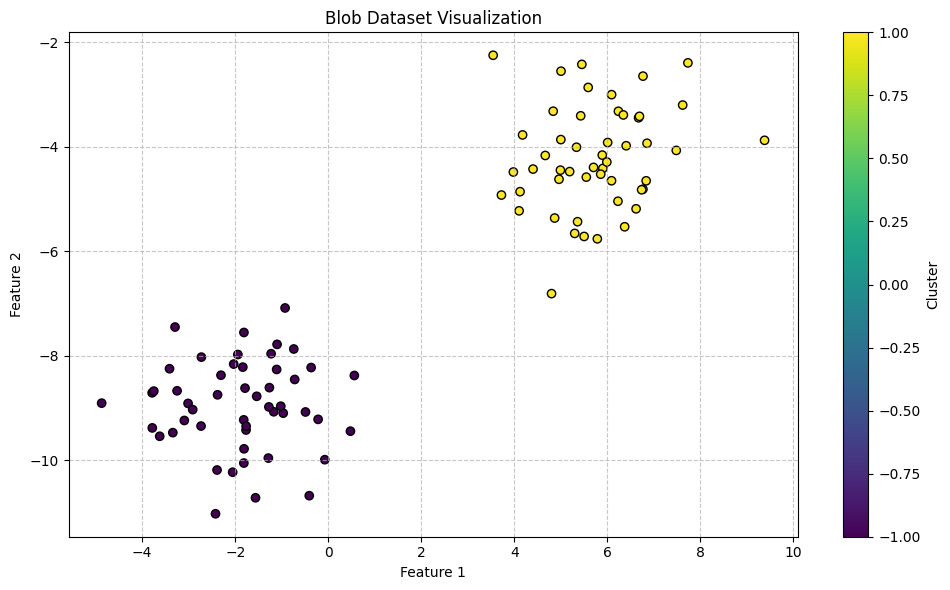

In [7]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X[:, 0], X[:, 1], c = y, cmap='viridis', edgecolor='black', linewidth=1)
plt.title('Blob Dataset Visualization')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(scatter, label='Cluster')
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [31]:
clf = SVM()
clf.fit(X, y, verbose = 1)
print(f'weights are {clf.w}, bias is {clf.b}')

Loss at iteration 0 is 0.00012885302005035583
Loss at iteration 50 is 0.0002511304286325715
Loss at iteration 100 is 0.0002498779097697213
Loss at iteration 150 is 0.0002486316378738764
Loss at iteration 200 is 0.0002524769130045173
Loss at iteration 250 is 0.000251217678519495
weights are [0.48082209 0.15117092], bias is -0.03000000000000002


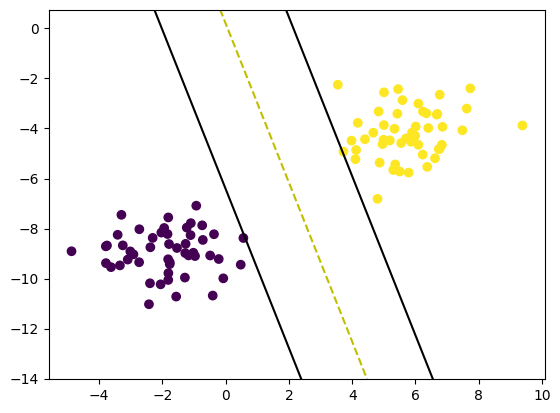

In [32]:
visualize_svm(X, y, clf)

Loss at iteration 0 is 0.0001222153659778687
Loss at iteration 50 is 0.0004285943306804994
Loss at iteration 100 is 0.0005026798817218957
Loss at iteration 150 is 0.0005386857918951051
Loss at iteration 200 is 0.0005745219295120434
Loss at iteration 250 is 0.0006101873251672892
[1.25029846 0.31818442] -0.45600000000000035


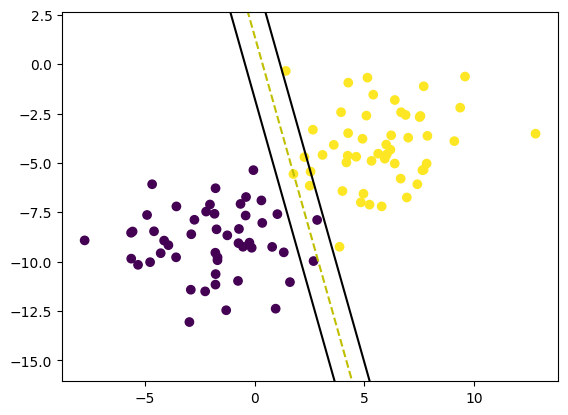

In [ ]:
X, y = datasets.make_blobs(n_samples=100, n_features=2, centers=2, cluster_std=2.05, random_state=40)
y = np.where(y == 0, -1, 1)

clf = SVM()
clf.fit(X, y, verbose=1)

print(clf.w, clf.b)
visualize_svm(X, y, clf)

In [21]:
class SMV_larange:
    def __init__(self, C = 1.0, tol = 1e-3):
        self.C = C
        self.tol = tol
        self.w = None
        self.b = None
        self.alphas = None
        self.support_vectors = None
        self.support_labels = None
    def fit(self, X, y):
        n_samples, n_features = X.shape
        K = np.zeros((n_samples, n_samples))
        for i in range(n_samples):
            for j in range(n_samples):
                K[i, j] = y[i]*y[j]*np.dot(X[i], X[j])
        P = matrix(K)
        q = matrix(-np.ones(n_samples))
        G = matrix(np.vstack((-np.eye(n_samples), np.eye(n_samples))))
        h = matrix(np.hstack((np.zeros(n_samples), np.ones(n_samples) * self.C)))
        A = matrix(y, (1, n_samples), 'd')
        b = matrix(0.0)
        solvers.options['show_progress'] = False
        solution = solvers.qp(P, q, G, h, A, b)
        alphas = np.array(solution['x']).flatten()
        sv_idx = alphas > self.tol
        self.alphas = alphas[sv_idx]
        self.support_vectors = X[sv_idx]
        self.support_labels = y[sv_idx]
        self.w = np.sum(self.alphas[:, np.newaxis] * self.support_labels[:, np.newaxis] * self.support_vectors, axis=0)
        sv = self.support_vectors[0]
        sv_label = self.support_labels[0]
        self.b = sv_label - np.dot(sv, self.w)
    def predict(self, X):
        return np.sign(np.dot(X, self.w)+self.b)



In [24]:
X, y = datasets.make_blobs(n_samples=100, n_features=2, centers = 2, cluster_std=1.05, random_state=40)
y = np.where(y == 0, -1, 1)
SVM = SMV_larange()
SVM.fit(X, y)

[0.38956958 0.22239248] 0.6450299624028961


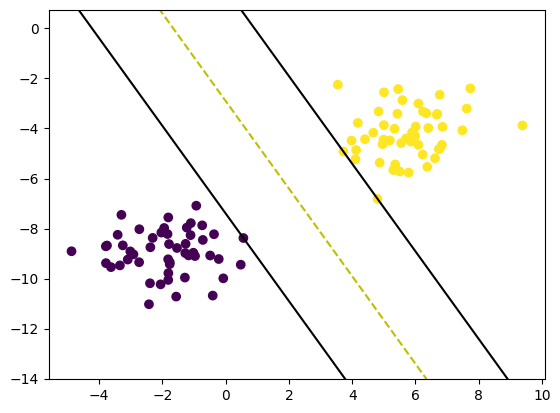

In [26]:
print(SVM.w, SVM.b)
visualize_svm(X, y, SVM)

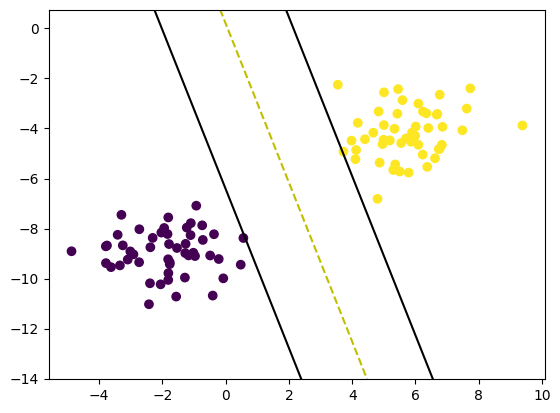

[0.48082209 0.15117092] -0.03000000000000002


In [34]:
visualize_svm(X, y, clf)
print(clf.w, clf.b)

In [38]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
np.vstack((a, b)).shape

(2, 3)

In [10]:
a[:,np.newaxis]

array([[[1, 2, 3]],

       [[4, 5, 6]]])

In [39]:
np.eye(4)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [42]:
np.vstack((-np.eye(3), np.eye(3)))

array([[-1., -0., -0.],
       [-0., -1., -0.],
       [-0., -0., -1.],
       [ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

In [4]:
print(list((2,3)))

[2, 3]


In [3]:
list((2, 3))

[2, 3]

In [6]:
for i in range(3):
    for j in range(i+1, 3):
        print(i, j)

0 1
0 2
1 2


In [7]:
nums = [1, 2, 3]
len(nums)

3

In [8]:
nums[3]

IndexError: list index out of range

In [9]:
dt = {'key1': 2, 'key2': 3, 'key3': 4}

In [12]:
print('key1' in dt) 

True


In [13]:
dt['key3'] = 3

In [14]:
dt

{'key1': 2, 'key2': 3, 'key3': 3}